In [31]:
import pandas as pd

vivit_metrics = pd.read_csv("vivit_validation_metrics_all_runs.csv")

precision_metrics = vivit_metrics[vivit_metrics["Metric"] == "Precision"]
recall_metrics = vivit_metrics[vivit_metrics["Metric"] == "Recall"]
accuracy_metrics = vivit_metrics[vivit_metrics["Metric"] == "Accuracy"]

In [ ]:
from scipy.stats import shapiro, levene
import numpy as np


def interpret_pvalue(pvalue: float, threshold: float = 0.05) -> str:
    """Interpret p-value against significance threshold"""
    return "PASSED" if pvalue > threshold else "FAILED"


def check_normality(metric_name: str, values: np.ndarray) -> None:
    """Test and interpret normality for a given metric"""
    statistic, pvalue = shapiro(values)
    result = interpret_pvalue(pvalue)
    print(f"{metric_name:10} {result:8} (p={pvalue:.4f})")
    if result == "FAILED":
        print(f"          WARNING: {metric_name} is not normally distributed!")


def check_equal_variances(
    accuracy: np.ndarray,
    recall: np.ndarray,
    precision: np.ndarray,
) -> None:
    """Test and interpret equality of variances across metrics"""
    statistic, pvalue = levene(accuracy, recall, precision)
    result = interpret_pvalue(pvalue)
    print(f"\nEqual Variances Test: {result} (p={pvalue:.4f})")
    if result == "FAILED":
        print("WARNING: Metrics have significantly different variances!")


accuracy_values = accuracy_metrics["Value"]
recall_values = recall_metrics["Value"]
precision_values = precision_metrics["Value"]

print("\nNormality Tests (Shapiro-Wilk):")
print("-" * 40)
check_normality("Accuracy", accuracy_values)
check_normality("Recall", recall_values)
check_normality("Precision", precision_values)

print("\nEquality of Variance Tests (Levene):")
print("-" * 40)
# todo: here we should check against the values of convnext,
# for now I'm leaving this as it is to test it is working
check_equal_variances(accuracy_values, recall_values, precision_values)


Normality Tests (Shapiro-Wilk):
----------------------------------------
Accuracy   PASSED   (p=0.2812)
Recall     FAILED   (p=0.0401)
Precision  PASSED   (p=0.1637)

Equality of Variance Tests (Levene):
----------------------------------------

Equal Variances Test: PASSED (p=0.7629)


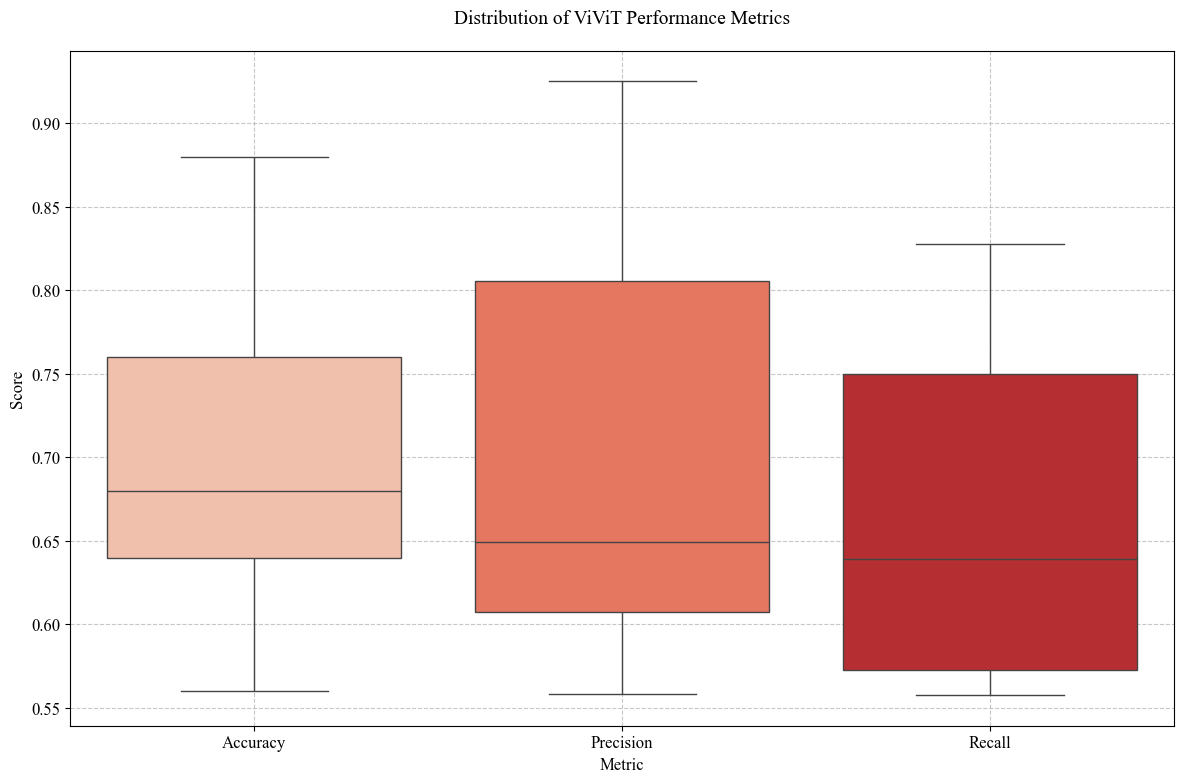

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


def create_metrics_boxplot(metrics: pd.DataFrame, name: str) -> None:
    """Create a box plot comparing accuracy, precision and recall"""
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = 12

    plt.figure(figsize=(12, 8))

    colors = sns.color_palette("Reds", n_colors=3)

    sns.boxplot(
        x="Metric",
        y="Value",
        hue="Metric",
        data=metrics,
        palette=colors,
        legend=False,
    )

    plt.title(f"Distribution of {name} Performance Metrics", pad=20, fontsize=14)
    plt.xlabel("Metric", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()


# Create and display the plot
create_metrics_boxplot(vivit_metrics, name="ViViT")